In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import *
from sklearn.metrics import *

In [139]:
player_data = pd.read_csv('merge_with_average.csv')

In [140]:
player_data['Pos'].unique()

array(['DB', 'LB', 'TE', nan, 'RB', 'DE', 'WR', 'QB', 'G', 'DT', 'T', 'C',
       'OLB', 'CB', 'S', 'FB', 'DL', 'ILB', 'OL', 'K', 'NT', 'P', 'LS'],
      dtype=object)

In [141]:
visited_positions = {} # track all positions that have been visited

index = 0
for _, row in player_data.iterrows():
	position = row["position"]
	# below is some cleaning to consolidate position data...Some positions were labeled more exactly than others, so we wanted to find averages of the larger dataset of people for
	# a player with a more exactly named position...An ILB is still a LB, but there are way more labeled LB than ILB in the dataset, so we used that average
	if position.startswith("E-"):
		position = position[2:]
	if position.startswith("QB"):
		position = "QB"
	if position == "ILB" or position == "OLB" or position.startswith("LB"):
		position = "LB"
	if position == "CB" or position == "SS" or position == "FS" or position == "S" or position.startswith("WB") or position.startswith("DB"):
		position = "DB"
	if position == "OT" or position == "OL" or position.startswith("T"):
		position = "T"
	if position == "OG" or position.startswith("G"):
		position = "G"
	if position.startswith("C"):
		position = "C"
	if position.startswith("HB") or position.startswith("RB"):
		position = "RB"
	if position.startswith("WR") or position.startswith("PR"):
		position = "WR"
	if position.startswith("TE") or position.startswith("TB") or position.startswith("LS"):
		position = "TE"
	if position.startswith("FB"):
		position = "FB"
	if position == "DL" or position.startswith("DE") or position.startswith("DT") or position.startswith("NT") or position.startswith("BB") or position.startswith("B") or position.startswith("E"):
		position = "DE"
	player_data.iloc[index, 5] = position
	index = index + 1

player_data.to_csv("merge_with_average.csv")

In [142]:
player_data['Pos'].unique()

array(['DB', 'LB', 'TE', nan, 'RB', 'DE', 'WR', 'QB', 'G', 'DT', 'T', 'C',
       'OLB', 'CB', 'S', 'FB', 'DL', 'ILB', 'OL', 'K', 'NT', 'P', 'LS'],
      dtype=object)

In [143]:
player_data = pd.read_csv('merge_with_average.csv')
player_data['Pos'].unique()


array(['DB', 'LB', 'TE', nan, 'RB', 'DE', 'WR', 'QB', 'G', 'DT', 'T', 'C',
       'OLB', 'CB', 'S', 'FB', 'DL', 'ILB', 'OL', 'K', 'NT', 'P', 'LS'],
      dtype=object)

In [144]:

input = player_data

features_cav = ["Pos", "age", "40_dash", "vertical", "broad", '3_cone', "CarAV"]

print(input.shape, "Before")

input_cav= input[input[features_cav].notnull().all(axis=1)]

print(input_cav.shape, "After")

final_features = ["Pos", "age", "40_dash", "vertical", "broad", '3_cone',"bench"]

corr_features = ["age", "40_dash", "vertical", "broad", '3_cone',"bench", "CarAV"]

X_corr = input_cav[corr_features]

X=input_cav[final_features]
#print(input_cav)

y = input_cav['CarAV']

(6361, 111) Before
(3636, 111) After


In [145]:
#X  = pd.concat([X, pd.get_dummies(X['Pos'])], axis=1)
X = X.drop('Pos', 1)

In [146]:
Xval = X.values

print(Xval)
print(len(Xval))
yval = y.values
print(yval)
print(len(yval))
X_train, X_validation, Y_train, Y_validation = train_test_split(Xval, yval, test_size=0.20, random_state=1)


[[ 22.96164384   4.59        33.5        119.           7.04219512
   12.        ]
 [ 22.78082192   4.61        39.         126.           7.2452439
   20.        ]
 [ 22.69589041   4.73        28.01383399 114.           7.87092024
   21.        ]
 ...
 [ 21.9369863    4.62        32.         117.           7.34
   16.        ]
 [ 23.62739726   4.81        35.5        118.           7.21
   16.        ]
 [ 23.46027397   4.84        29.5        110.           7.6
   18.69061876]]
3636
[45. 33.  0. ... 22.  0.  9.]
3636


In [147]:
model = LinearRegression()
#kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [148]:
model = model.fit(X_train, Y_train)
ypred = model.predict(X_train)


In [149]:
model.score(X_train, Y_train)

0.045649927789882194

In [150]:
print(model.score(X_validation, Y_validation))
ypred = model.predict(X_validation)
print(model.coef_)
print(model.intercept_)

0.045573571610362906
[-5.38578264  0.78270456  0.14427602  0.03769544  0.6684052   0.28717512]
117.71689598070472


In [151]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


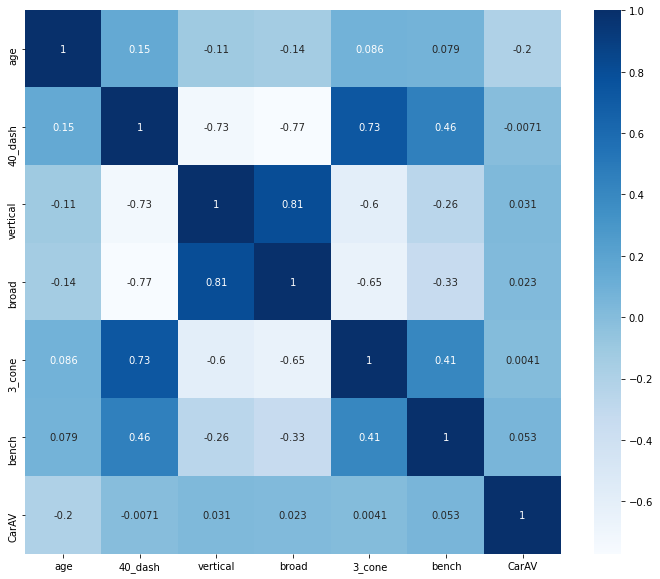

In [152]:
import seaborn as sns

plt.figure(figsize=(12,10))
cor = X_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

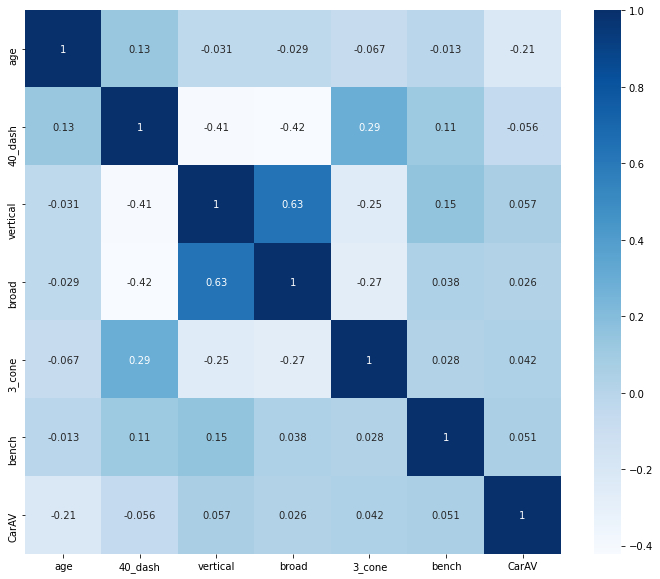

In [160]:
wide_receivers = input_cav[input_cav['Pos'] == "WR"]
wr_corr = wide_receivers[corr_features]
plt.figure(figsize=(12,10))
wrcor = wr_corr.corr()
sns.heatmap(wrcor, annot=True, cmap=plt.cm.Blues)
plt.show()

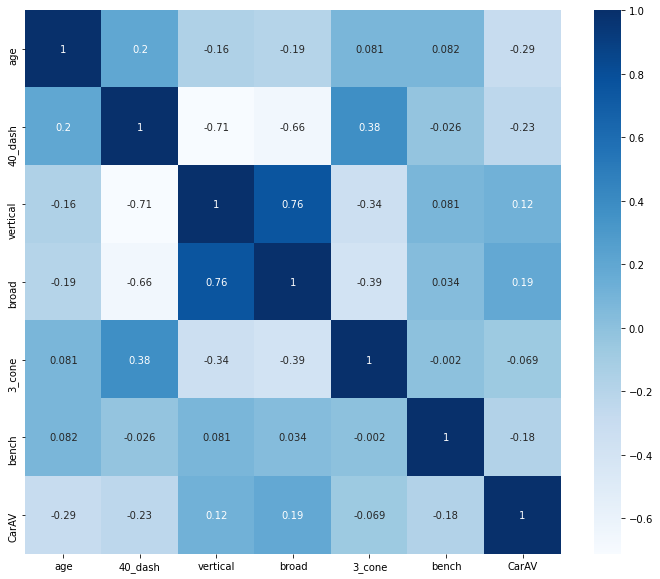

In [194]:
qbs = input_cav[input_cav['Pos'] == "QB"]
qb_corr = qbs[corr_features]
plt.figure(figsize=(12,10))
qbcor = qb_corr.corr()
sns.heatmap(qbcor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [162]:
def get_regression_per_position(input, position):
    features_cav = ["Pos", "age", "40_dash", "vertical", "broad", '3_cone', "CarAV"]

    input_cav = input[input[features_cav].notnull().all(axis=1)]

    input_cav = input_cav[input_cav['Pos'] == position]

    final_features = ["age", "40_dash", "vertical", "broad", '3_cone',"bench"]

    corr_features = ["age", "40_dash", "vertical", "broad", '3_cone',"bench", "CarAV"]

    X=input_cav[final_features]
    #print(input_cav)

    y = input_cav['CarAV']

    corr = input_cav[corr_features]
    plt.figure(figsize=(12,10))
    cor = corr.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
    plt.show()

    X['Intercept'] = 1

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

    model = sm.OLS(y_train, x_train)
    model = model.fit()
    pred = model.predict(x_test)
    pred.to_csv("TESTING_PRED.txt")

    model.summary()

    return model

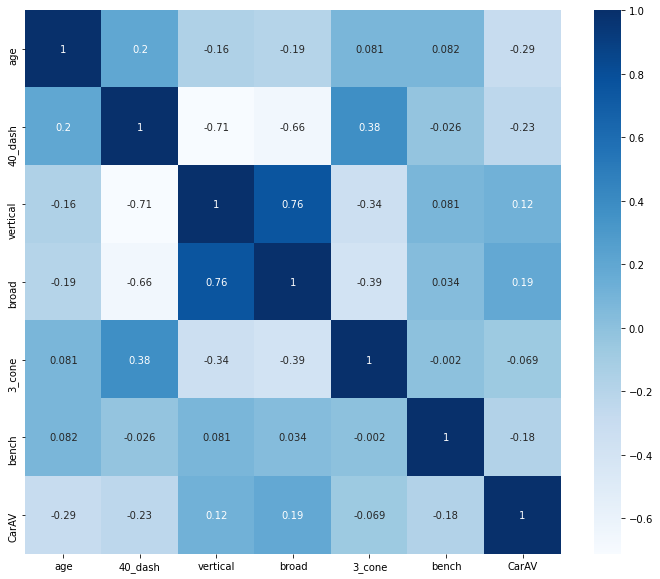

<ipython-input-162-63ac196cf81d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CarAV   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     5.193
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           7.82e-05
Time:                        02:52:58   Log-Likelihood:                -684.22
No. Observations:                 141   AIC:                             1382.
Df Residuals:                     134   BIC:                             1403.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -11.3072      3.053     -3.704      0.000     -17.345      -5.270
40_dash      -39.8016     23.802     -1.672      0.097     -86.878       7.274
vertical      -1.3070      1.551     -0.843      0.401      -4.374       1.760
broad          0.5936      0.648      0.915      0.362      -0.689       1.876
3_cone         3.3449     16.309      0.205      0.838     -28.911      35.600
bench         -2.7556      1.241     -2.221      0.028      -5.209      -0.302
Intercept    467.6359    197.371      2.369      0.019      77.271     858.001
==============================================================================
Omnibus:                       55.328   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.386
Skew:                           1.667   Prob(JB):                     8.02e-29
Kurtosis:                       6.303   Cond. No.                     8.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
qb_model = get_regression_per_position(player_data, "QB")
qb_model.summary()

In [252]:
def corrs_by_position(input_cav, position):
    
    features_cav = ["Pos", 'heights', 'weights', 'hands', 'age', 'arm', '40_dash', 'vertical','bench', 'shuttle', 'broad', '3_cone', '60_shuttle',"CarAV"]

    input_cav = input[input[features_cav].notnull().all(axis=1)]

    input_cav = input_cav[input_cav['Pos'] == position]

    final_features = ["age", "40_dash", "vertical", "broad", '3_cone',"bench"]

    corr_features = ["Pos", 'heights', 'weights', 'hands', 'age', 'arm', '40_dash', 'vertical','bench', 'shuttle', 'broad', '3_cone', '60_shuttle',"CarAV"]

    X=input_cav[final_features]
    #print(input_cav)

    y = input_cav['CarAV']

    corr = input_cav[corr_features]
    #plt.title("Correlation of Combine Stats and Career Value for " + position)
    plt.figure(figsize=(16,14))
    cor = corr.corr()
    sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(0,255,sep=77, as_cmap=True)).set_title("Correlation of Combine Stats and Career Value for " + position)
    plt.show()

    return X, y
    

In [203]:
def generate_lr_with_feature_list(data_in, position, features=["age", "40_dash", "vertical", "broad", '3_cone',"bench"]):

    features_cav = ["Pos", "age", "40_dash", "vertical", "broad", '3_cone', "CarAV"]
    data = data_in[data_in[features_cav].notnull().all(axis=1)]
    data = data[data['Pos'] == position]

    X=data[features]
    #print(input_cav)

    y = data['CarAV']
    
    X['Intercept'] = 1

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

    model = sm.OLS(y_train, x_train)
    model = model.fit()
    pred = model.predict(x_test)

    return model, pred, y_test

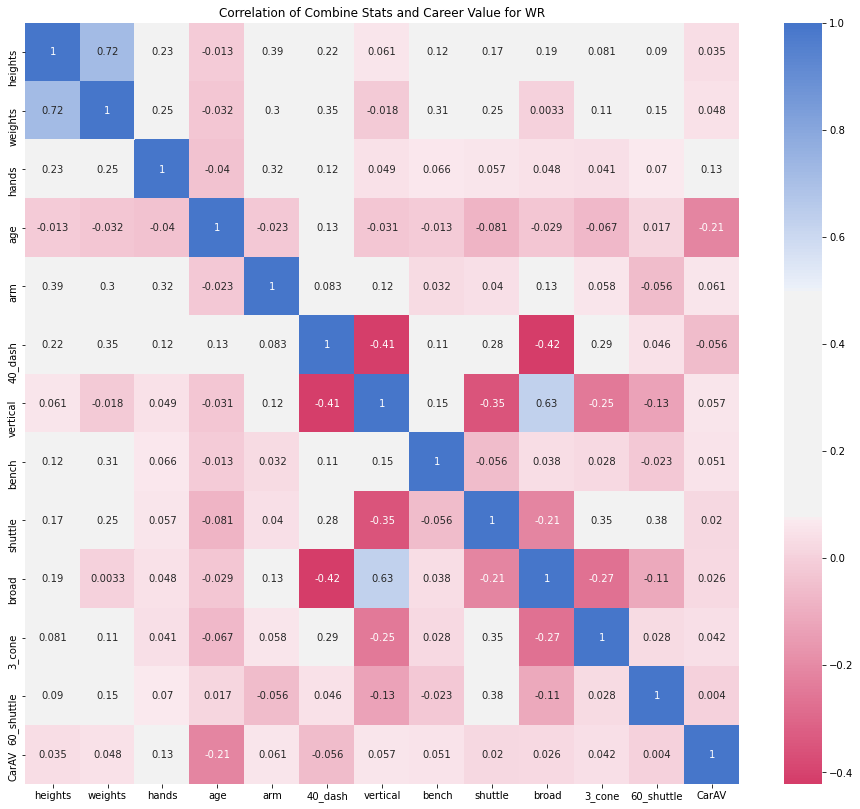

In [259]:
lb_corrs = corrs_by_position(player_data, "WR")

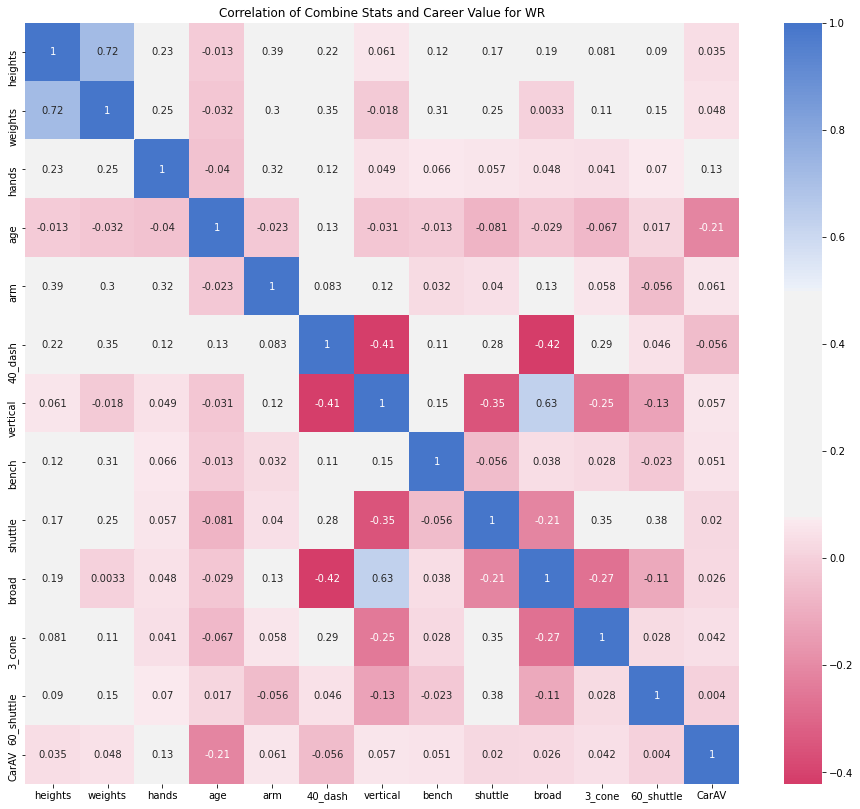

WRRegression Summary


<ipython-input-203-b3788354b9e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CarAV   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.489
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.75e-05
Time:                        12:26:28   Log-Likelihood:                -1882.1
No. Observations:                 419   AIC:                             3772.
Df Residuals:                     415   BIC:                             3788.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -5.2465      1.236     -4.245      0.000      -7.676      -2.817
40_dash      -15.5409      9.917     -1.567      0.118     -35.034       3.953
arm            2.2028      1.311      1.680      0.094      -0.374       4.780
Intercept    136.3781     61.364      2.222      0.027      15.755     257.001
==============================================================================
Omnibus:                      129.014   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.555
Skew:                           1.621   Prob(JB):                     4.41e-62
Kurtosis:                       5.383   Cond. No.                     2.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [270]:
pos = "WR"
pos_corrs = corrs_by_position(player_data, pos)
pos_model, pred, y_test = generate_lr_with_feature_list(player_data, pos,["age", "40_dash", "arm"])
print(pos + "Regression Summary")
pos_model.summary()

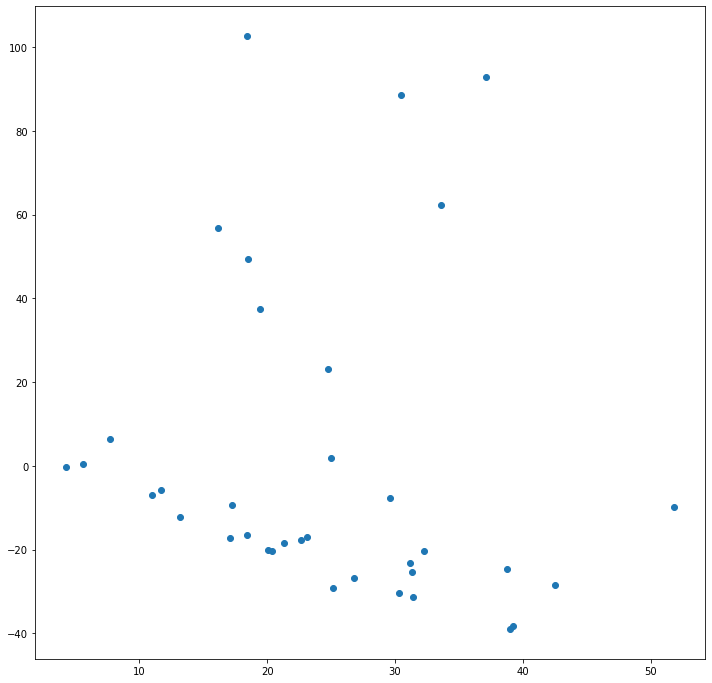

In [205]:
residual = y_test - pred
residual.size

fig, ax = plt.subplots(figsize=(12,12))
_ = ax.scatter(pred, residual)

In [153]:
X['Intercept'] = 1

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


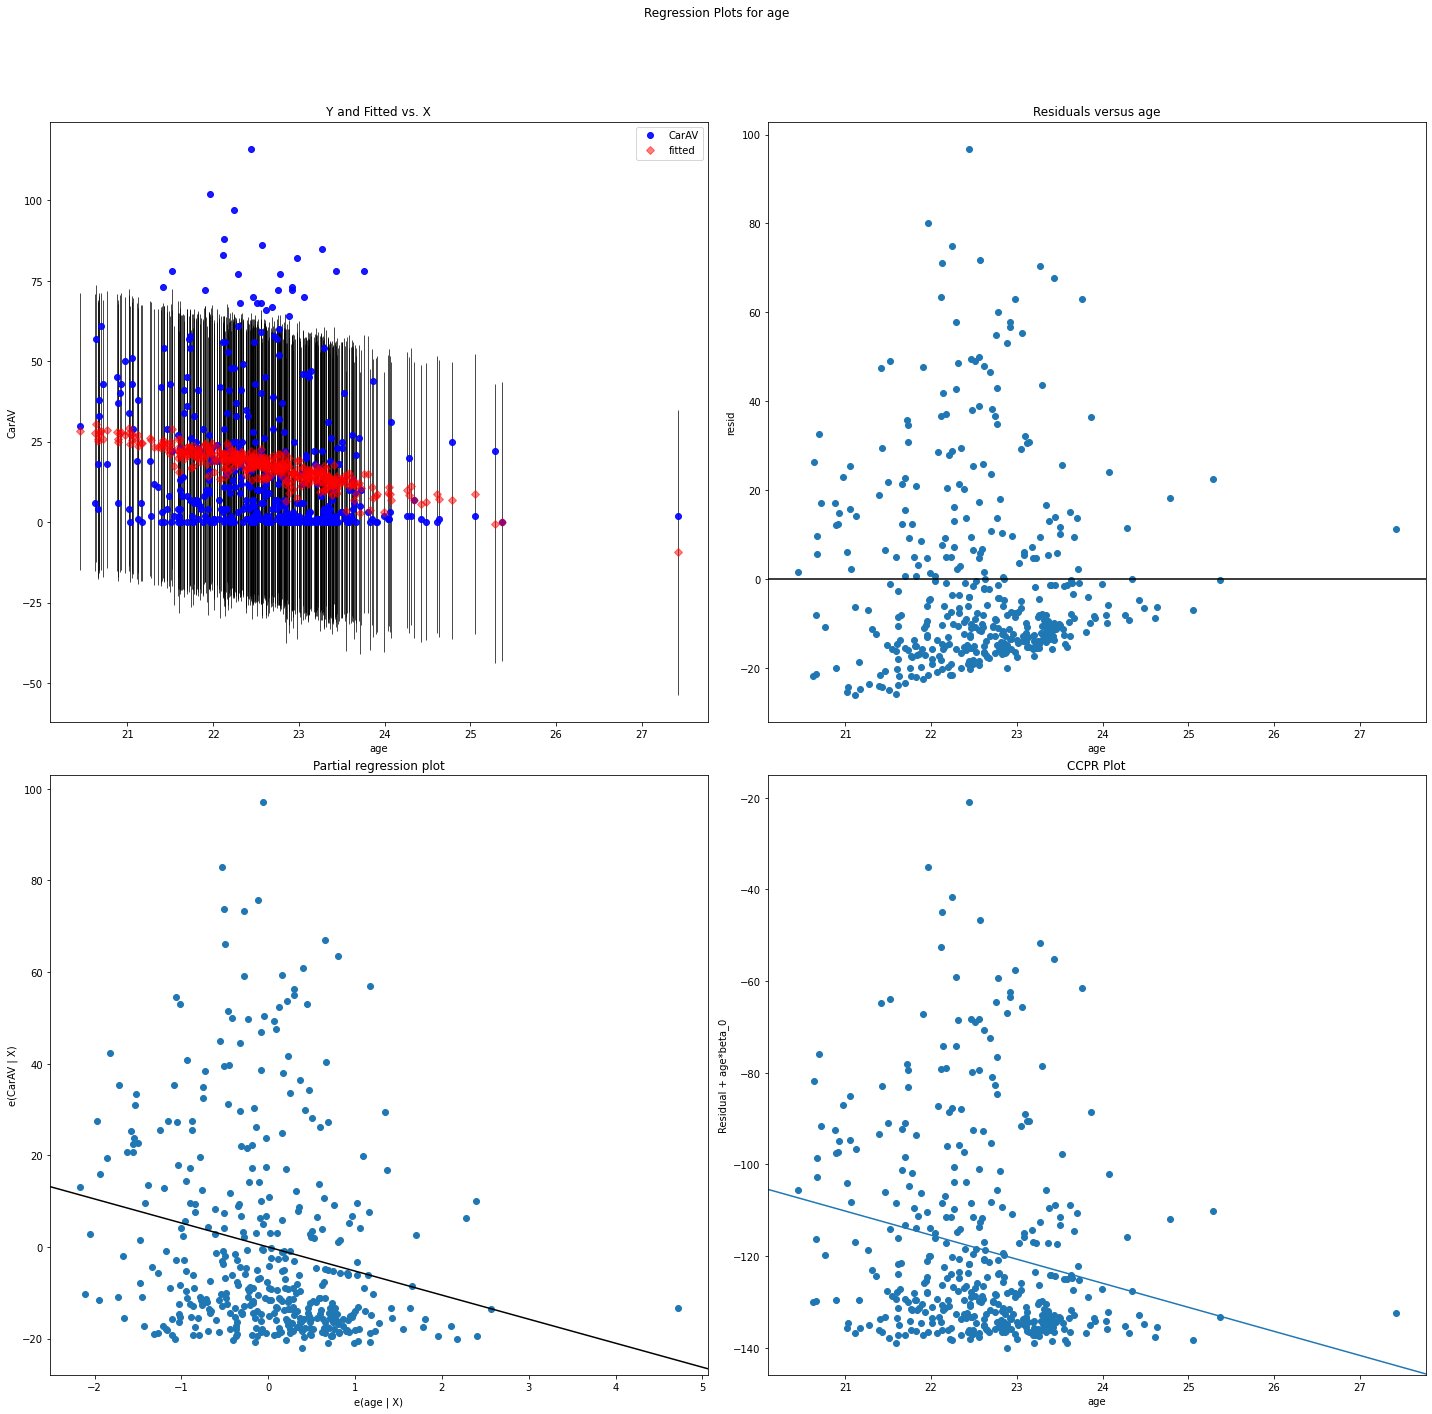

In [271]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(pos_model, 'age', fig = fig)

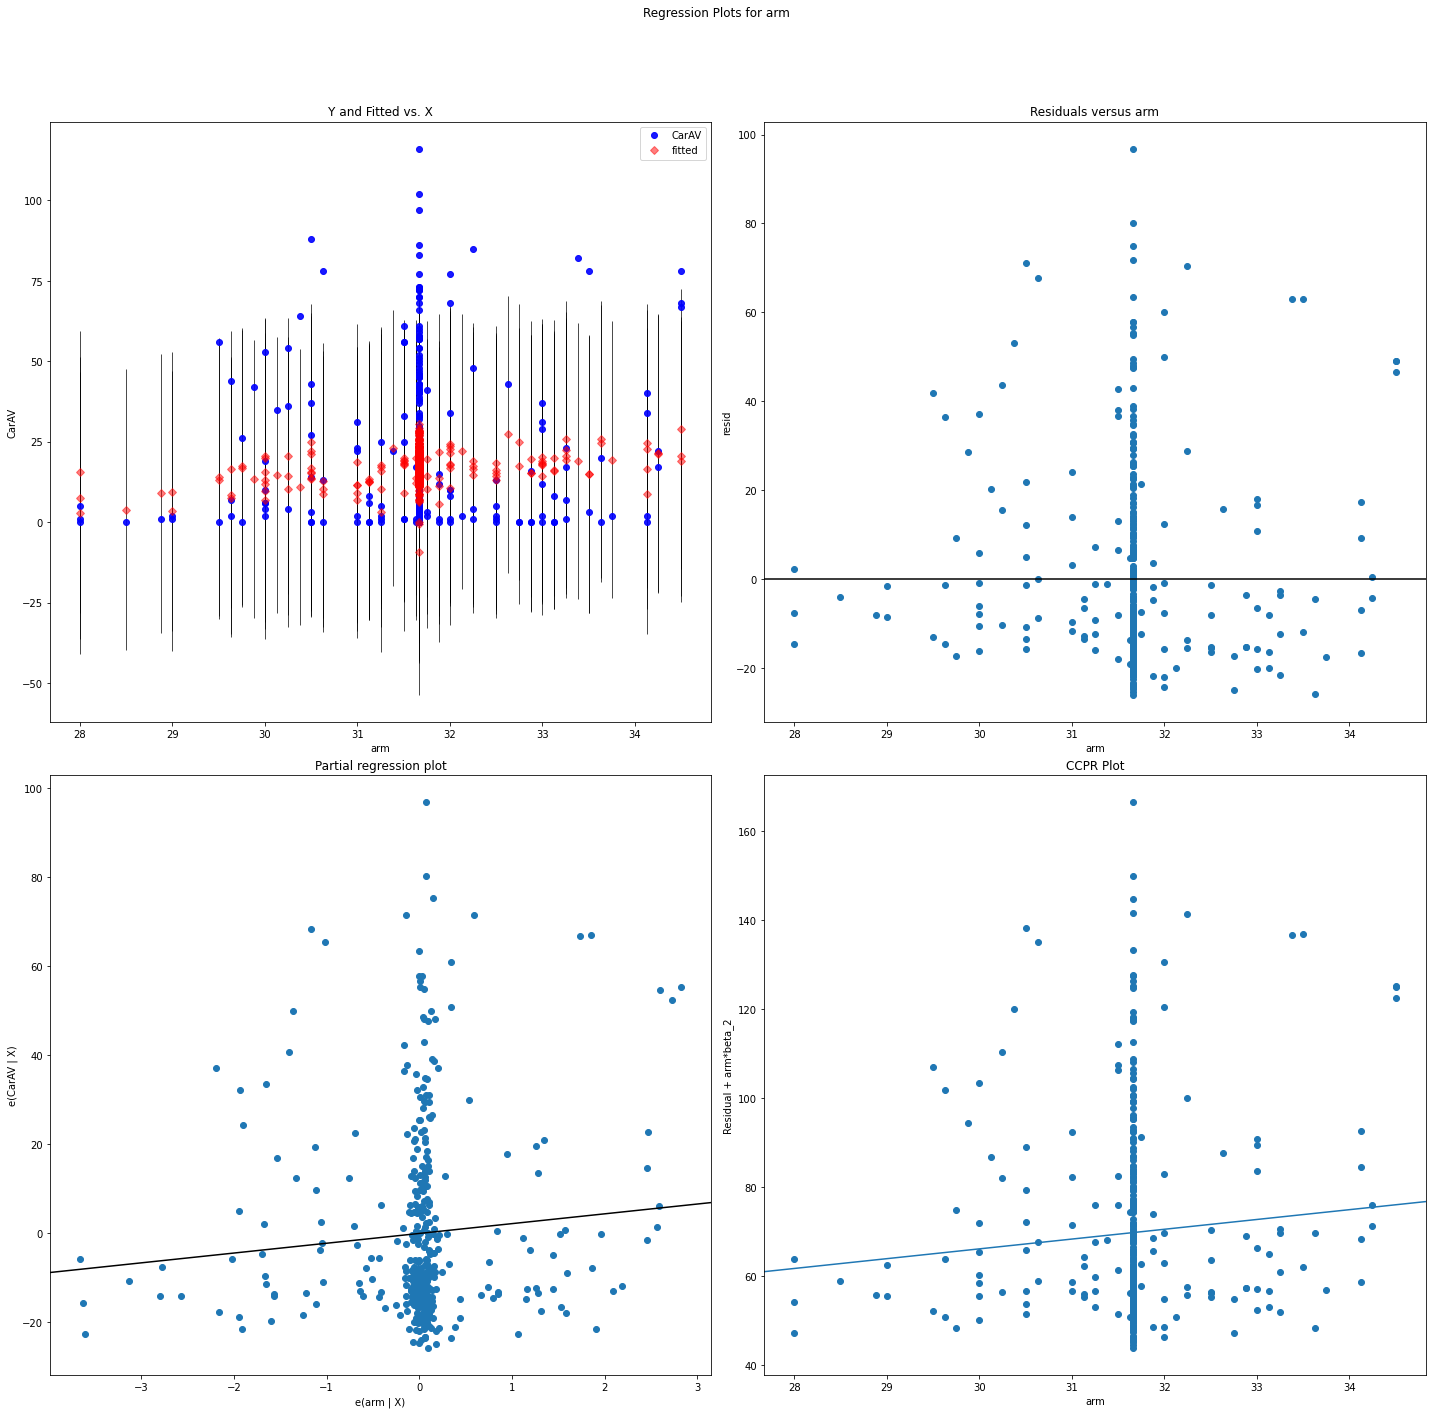

In [272]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(pos_model, 'arm', fig = fig)

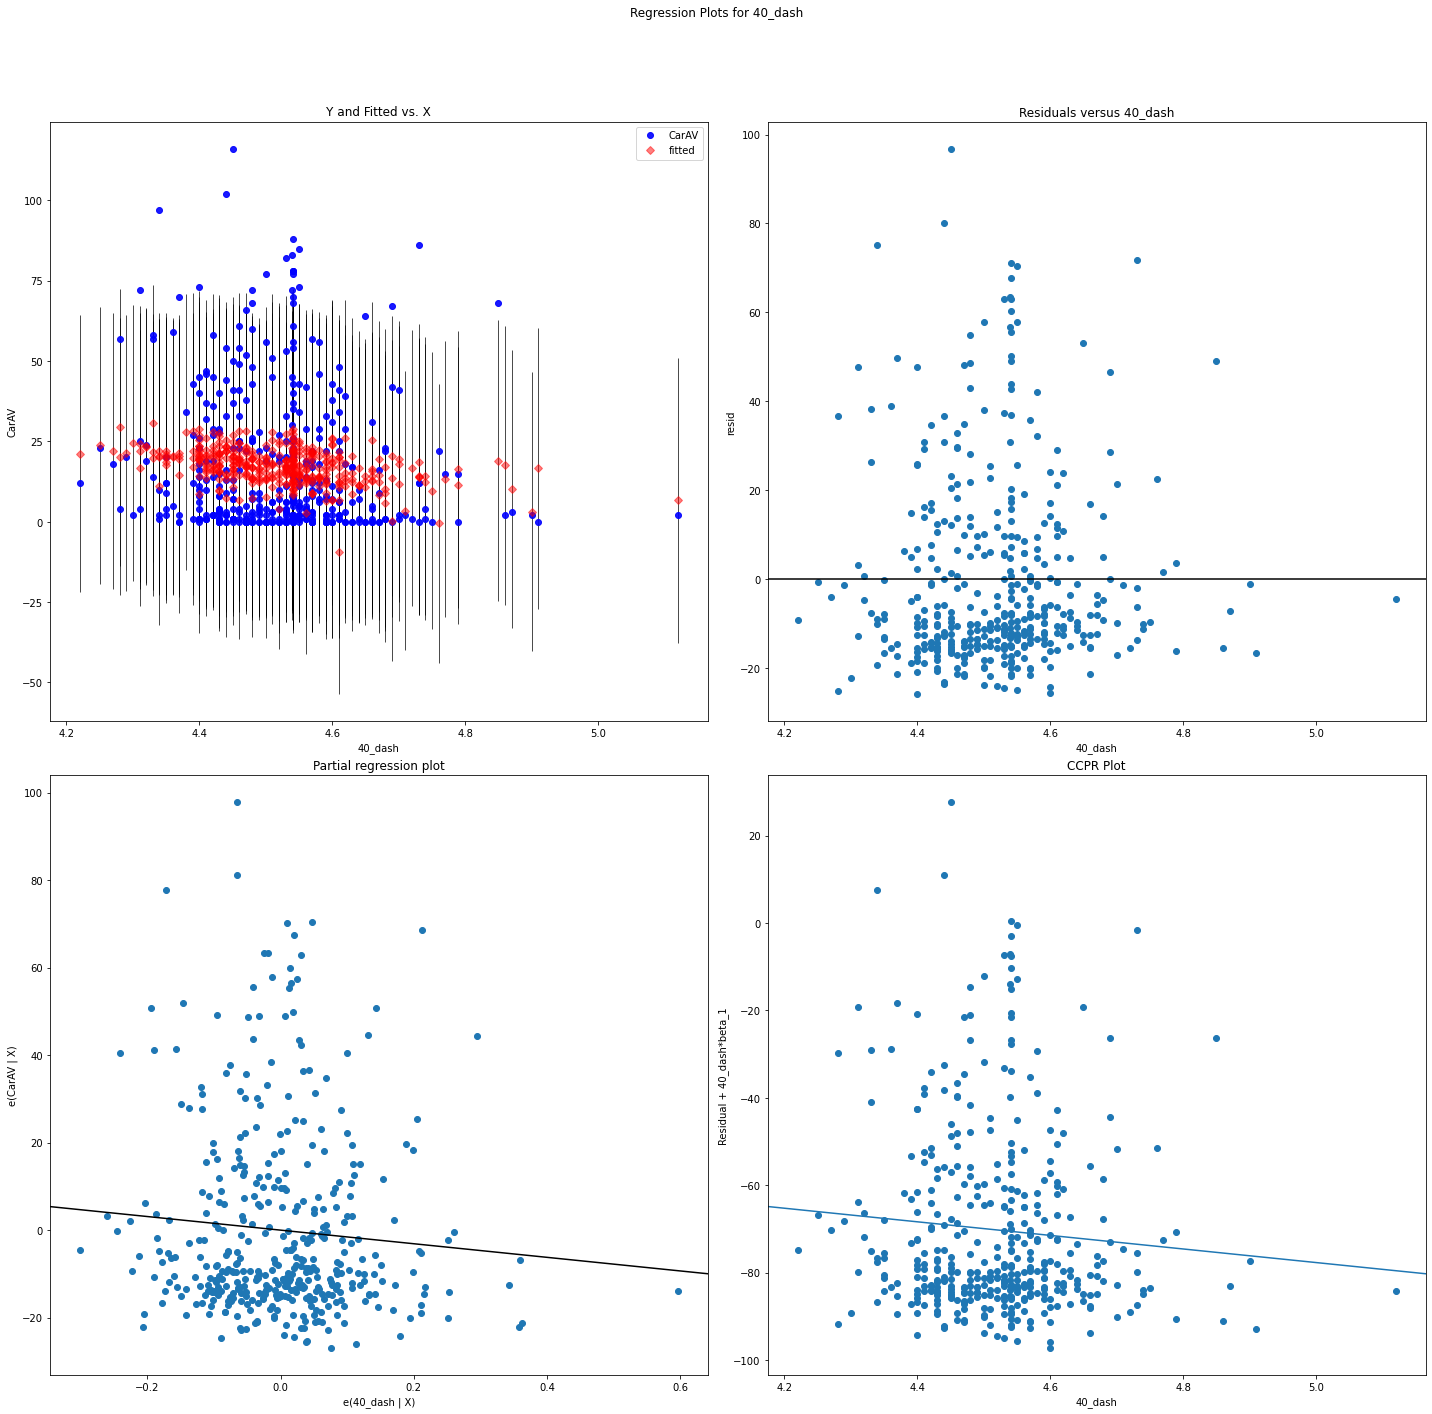

In [273]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(pos_model, '40_dash', fig = fig)

In [154]:
log_model = sm.OLS(y_train, x_train)
log_model = log_model.fit()
log_predictions = log_model.predict(x_test)
pred = np.exp(log_predictions)
pred.to_csv("TESTING_PRED.txt")
true = y_test

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CarAV   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     21.59
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           5.98e-25
Time:                        02:15:11   Log-Likelihood:                -13052.
No. Observations:                2908   AIC:                         2.612e+04
Df Residuals:                    2901   BIC:                         2.616e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -5.3172      0.492    -10.809      0.000      -6.282      -4.353
40_dash        0.0935      2.654      0.035      0.972      -5.110       5.297
vertical       0.1381      0.182      0.759      0.448      -0.219       0.495
broad         -0.0197      0.092     -0.214      0.831      -0.200       0.161
3_cone         0.0204      1.629      0.013      0.990      -3.173       3.214
bench          0.2619      0.077      3.411      0.001       0.111       0.413
Intercept    131.0664     22.966      5.707      0.000      86.035     176.098
==============================================================================
Omnibus:                      960.433   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2896.587
Skew:                           1.711   Prob(JB):                         0.00
Kurtosis:                       6.493   Cond. No.                     7.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
X_validation[:,0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

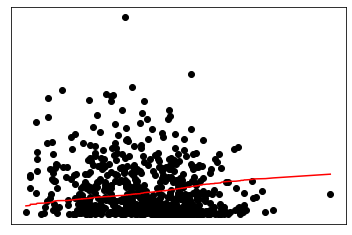

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_validation[:,0], Y_validation, color="black")
plt.plot(np.sort(X_validation[:,0]), np.sort(ypred), color='r')
#plt.plot(X_validation[:,1], ypred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()